In [1]:
import h5py, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [2]:
import sys; sys.path.append("../../offline/")
import sparse, geom, utils

In [3]:
path_to_data = "../../data/sparse/" # scratch/sparse on Maxwell
path_to_aux = "../../data/aux/" # scratch/benedikt/aux on Maxwell
path_to_geometry = "../../geometry/"
path_to_recons = "../../data/recons/"

## Load good-pixel mask

In [4]:
with h5py.File(path_to_aux + "goodpixels.h5", 'r') as f:
    goodpixels = f['data/data'][:]

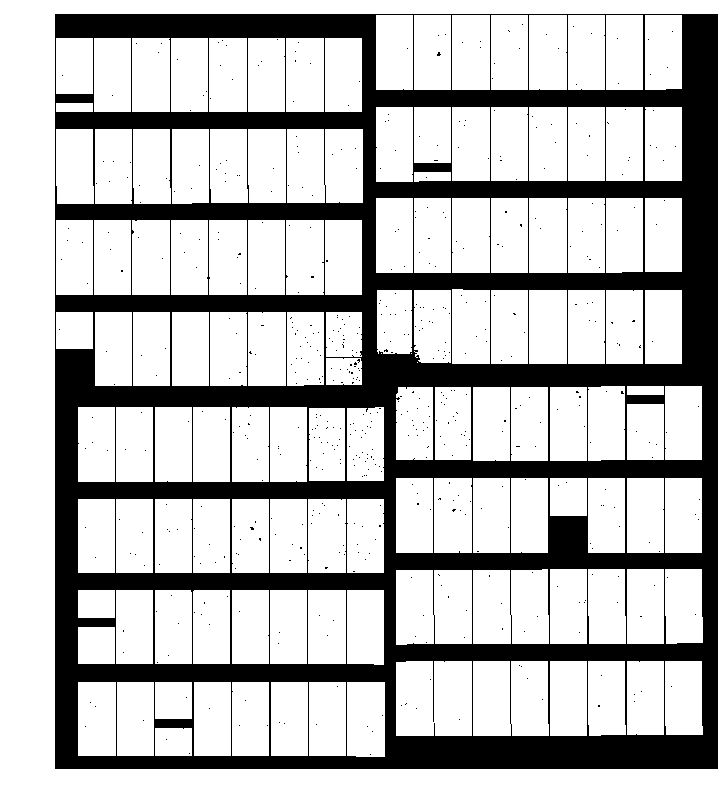

In [5]:
plt.figure(figsize=(10,10), dpi=100)
plt.axis('off')
plt.imshow(utils.assemble(goodpixels, path_to_geometry + "b2.geom"), cmap='gray')
plt.show()

## Load run 597 masks

In [6]:
masks = []
for m in range(16):
    with h5py.File(path_to_recons + 'det/r0597/r0597_AGIPD%02d_v01_mask.h5' %m, 'r') as f:
        masks.append(np.bool8(f['mask'][:]))
masks = np.array(masks)

In [7]:
combined_mask = np.transpose(masks.all(axis=1),axes=(0,2,1))

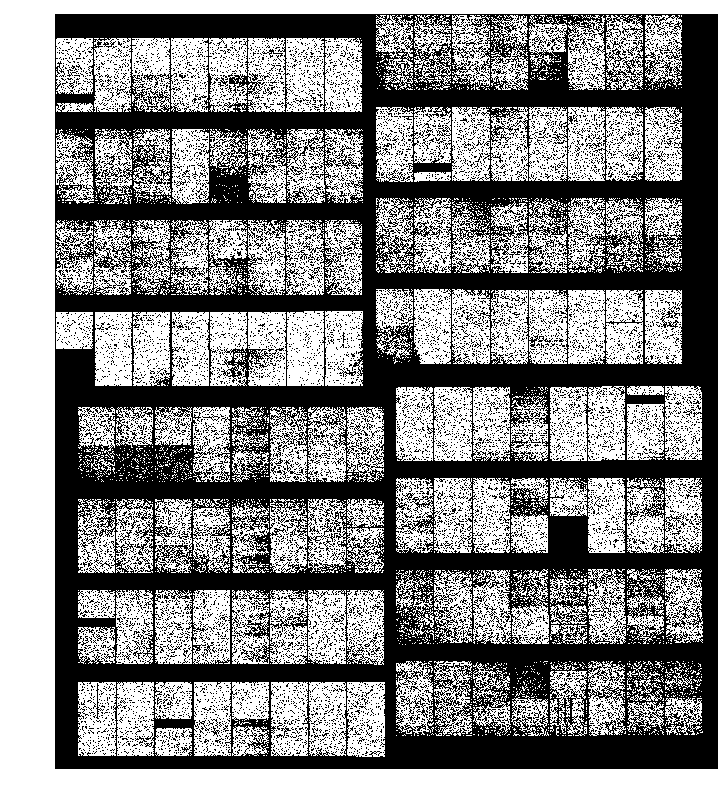

In [8]:
plt.figure(figsize=(10,10), dpi=100)
plt.axis('off')
plt.imshow(utils.assemble(combined_mask, path_to_geometry + "b2.geom"), cmap='gray')
plt.show()

## Differences

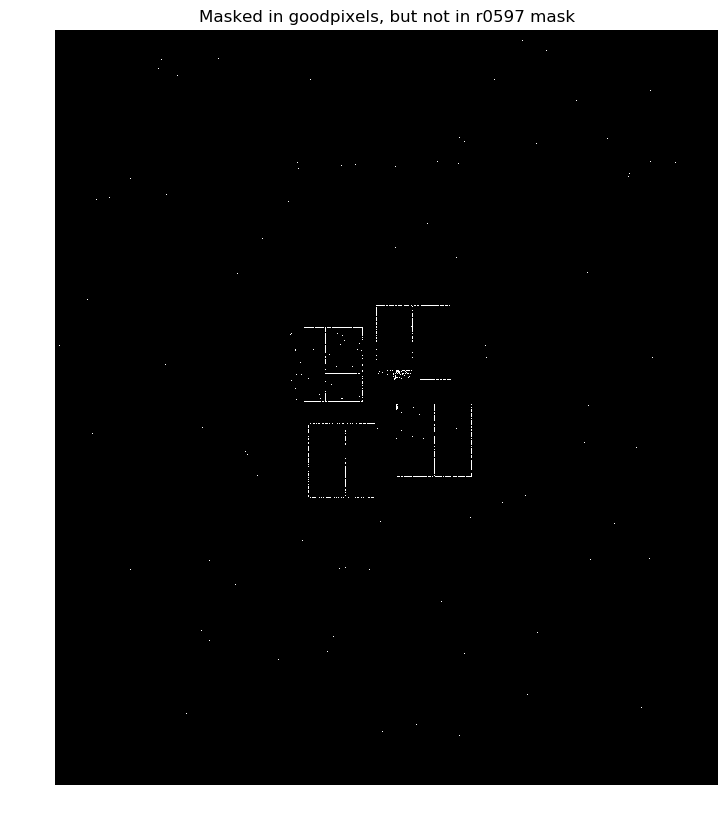

In [9]:
plt.figure(figsize=(10,10), dpi=100)
plt.title("Masked in goodpixels, but not in r0597 mask")
plt.axis('off')
plt.imshow(utils.assemble(combined_mask & (~goodpixels), path_to_geometry + "b2.geom"), cmap='gray')
plt.show()

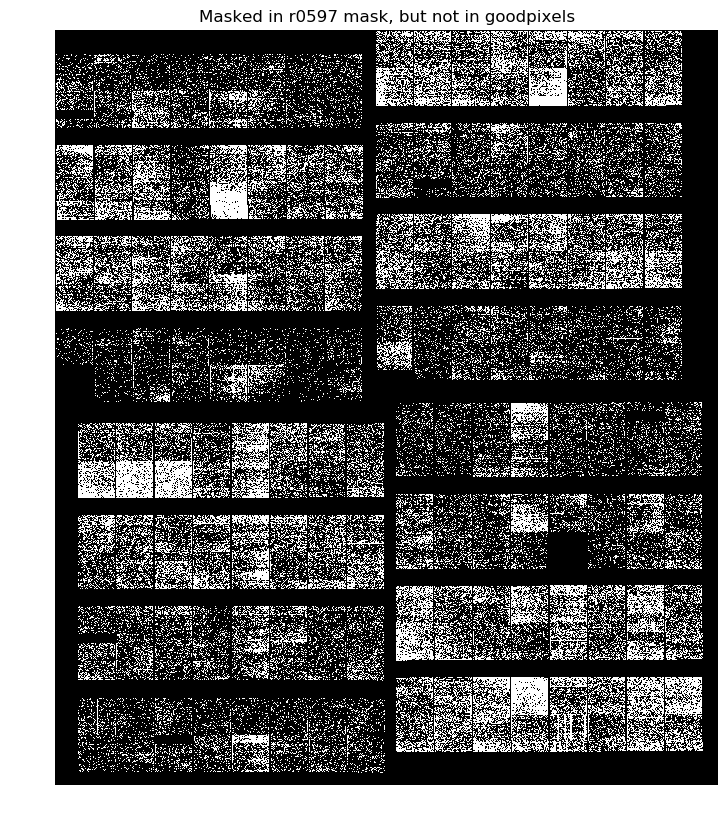

In [10]:
plt.figure(figsize=(10,10), dpi=100)
plt.title("Masked in r0597 mask, but not in goodpixels")
plt.axis('off')
plt.imshow(utils.assemble((~combined_mask) & (goodpixels), path_to_geometry + "b2.geom"), cmap='gray')
plt.show()

In [11]:
print(goodpixels.sum()/goodpixels.size)
print(combined_mask.sum()/combined_mask.size)

0.98069858551
0.654311180115
